<a href="https://colab.research.google.com/github/leolani/cltl-face-all/blob/master/examples/colab/4.ERC-MELD-compact-visual-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download the precomputed visual features

In [ ]:
!pip install tqdm av
!gdown --id 1P7pIYQAG3ePjaCLJf7F_g7DOBzTr7Tva
!gdown --id 16ck7plW9v9eSHGCs5wuB2AhhufPRt3Wi
!unzip smaller-dataset.zip
!rm smaller-dataset.zip

!wget https://raw.githubusercontent.com/leolani/cltl-face-all/master/examples/smaller-datasets-jsons/datasets.json
import json

with open('datasets.json', 'r') as stream:
    datasets = json.load(stream)

datasets = datasets['large']

     |████████████████████████████████| 36.9MB 119kB/s 
Downloading...
From: https://drive.google.com/uc?id=1P7pIYQAG3ePjaCLJf7F_g7DOBzTr7Tva
To: /content/compact-visual.pkl
26.6MB [00:00, 84.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=16ck7plW9v9eSHGCs5wuB2AhhufPRt3Wi
To: /content/smaller-dataset.zip
629MB [00:08, 74.2MB/s]
Archive:  smaller-dataset.zip
   creating: smaller-dataset/
  inflating: smaller-dataset/dia47_utt0.mp4  
  inflating: smaller-dataset/dia47_utt1.mp4  
  inflating: smaller-dataset/dia47_utt2.mp4  
  inflating: smaller-dataset/dia47_utt3.mp4  
  inflating: smaller-dataset/dia47_utt4.mp4  
  inflating: smaller-dataset/dia47_utt5.mp4  
  inflating: smaller-dataset/dia47_utt6.mp4  
  inflating: smaller-dataset/dia47_utt7.mp4  
  inflating: smaller-dataset/dia47_utt8.mp4  
  inflating: smaller-dataset/dia47_utt9.mp4  
  inflating: smaller-dataset/dia47_utt11.mp4  
  inflating: smaller-dataset/dia47_utt12.mp4  
  inflating: smaller-dataset/dia47_utt13.mp4

## Unpickle it

In [ ]:
import pickle

with open('compact-visual.pkl', 'rb') as stream:
    pickled = pickle.load(stream)

X = pickled['X']
y = pickled['y']
original_diautt = pickled['original_diautt']

## stack them up to make it even easier.

If you run below cell, it shows that every data sample has three axis (time, num_landmarks, 2). Every data point has different time length. Every data sample has corresponding label, which is a one hot vector of length 7

In [ ]:
import numpy as np
for (key, val), (key_, val_) in zip(X.items(), y.items()):
    assert key == key_
    assert len(val) == len(val_)

    for idx, visual_features in enumerate(val):
        X[key][idx] = np.stack(visual_features)

for (key, val), (key_, val_) in zip(X.items(), y.items()):
    print(key)
    for visual_features, label in zip(val[:10], val_[:10]):
        print(visual_features.shape, label.shape)
    print()

train
(9, 68, 2) (7,)
(54, 68, 2) (7,)
(86, 68, 2) (7,)
(64, 68, 2) (7,)
(45, 68, 2) (7,)
(28, 68, 2) (7,)
(30, 68, 2) (7,)
(27, 68, 2) (7,)
(61, 68, 2) (7,)
(134, 68, 2) (7,)

dev
(30, 68, 2) (7,)
(81, 68, 2) (7,)
(101, 68, 2) (7,)
(22, 68, 2) (7,)
(16, 68, 2) (7,)
(17, 68, 2) (7,)
(25, 68, 2) (7,)
(77, 68, 2) (7,)
(64, 68, 2) (7,)
(250, 68, 2) (7,)

test
(72, 68, 2) (7,)
(16, 68, 2) (7,)
(160, 68, 2) (7,)
(64, 68, 2) (7,)
(87, 68, 2) (7,)
(40, 68, 2) (7,)
(54, 68, 2) (7,)
(103, 68, 2) (7,)
(117, 68, 2) (7,)
(46, 68, 2) (7,)



The first data sample has time length of 5. I'll show you what this means.

Obviously this sequence of face is labeled as "disgust"

[1 0 0 0 0 0 0] 0 anger


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


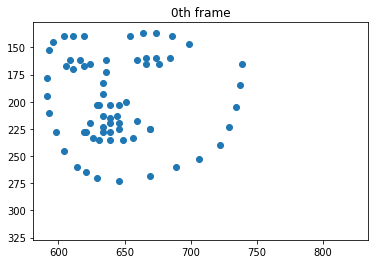

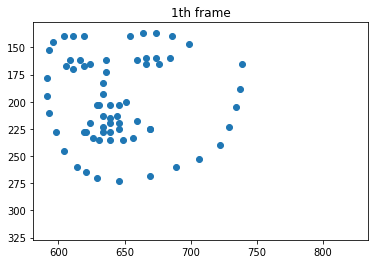

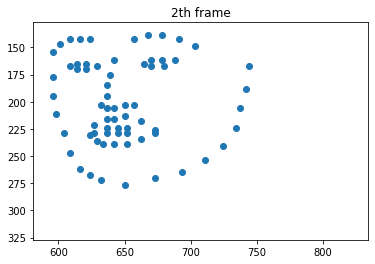

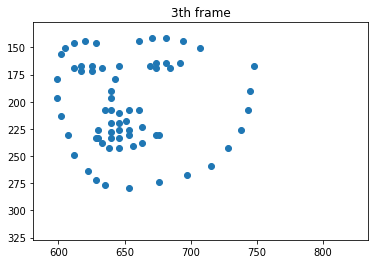

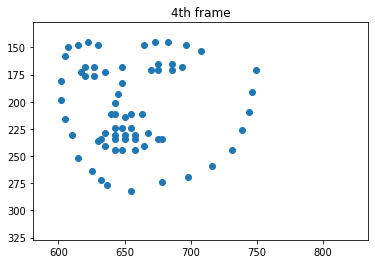

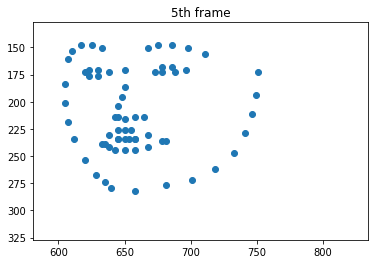

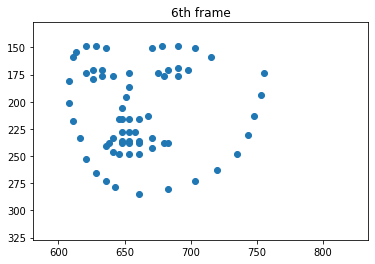

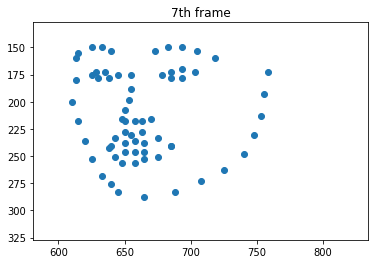

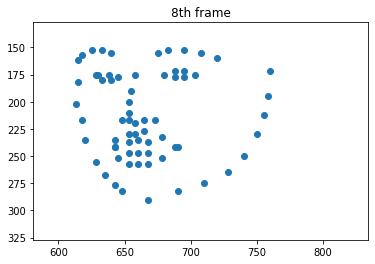

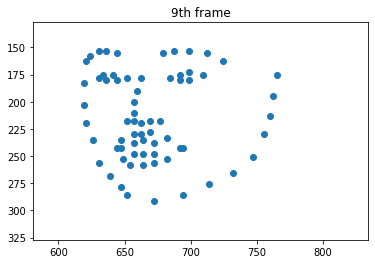

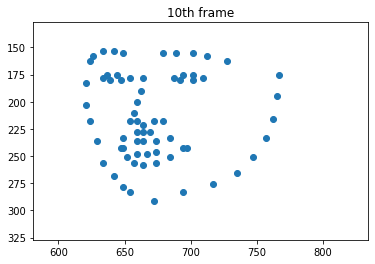

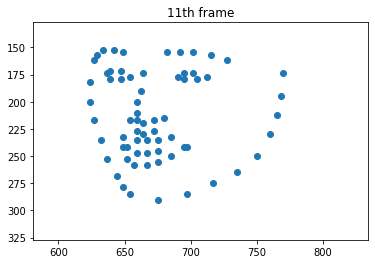

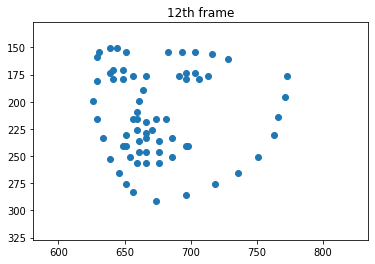

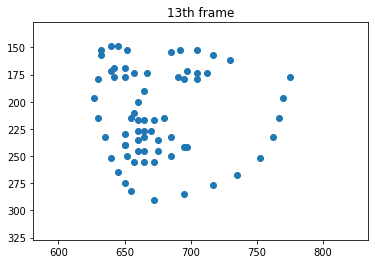

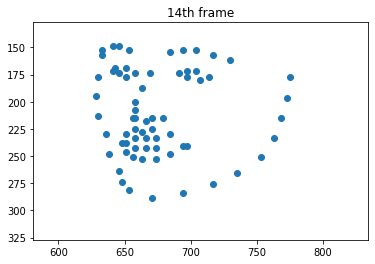

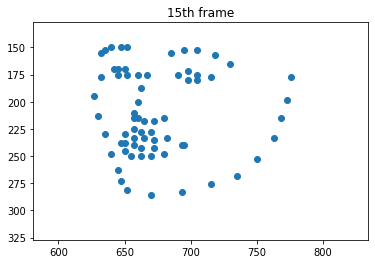

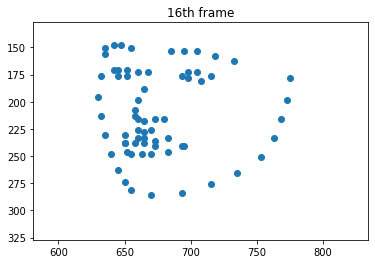

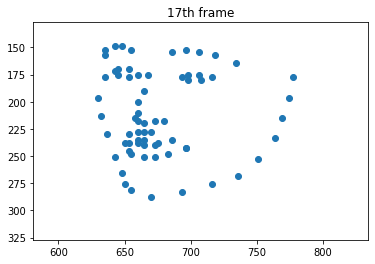

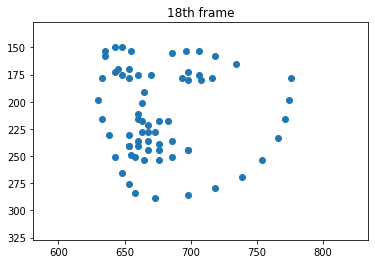

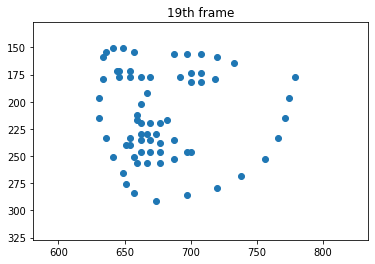

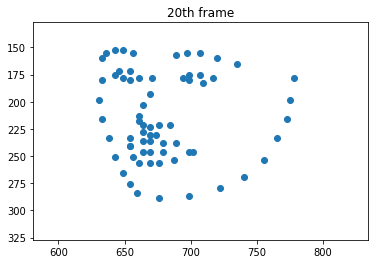

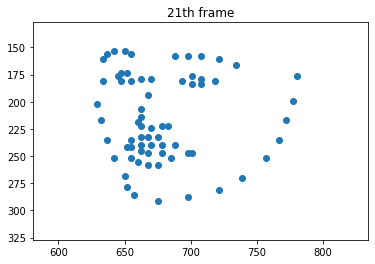

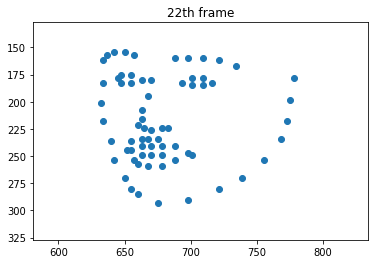

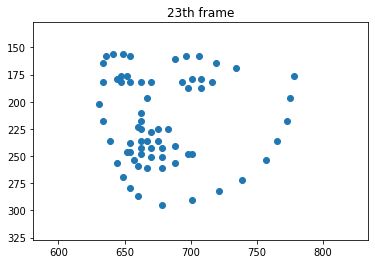

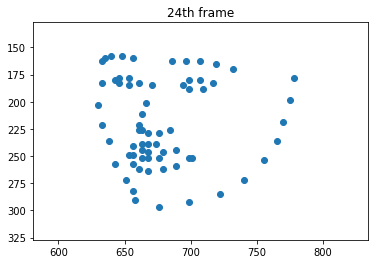

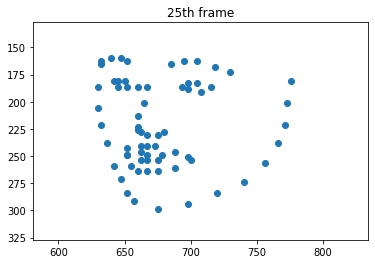

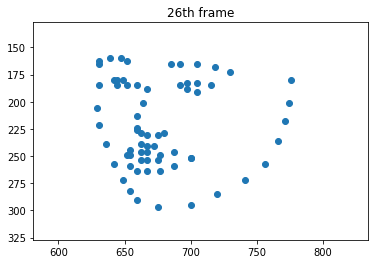

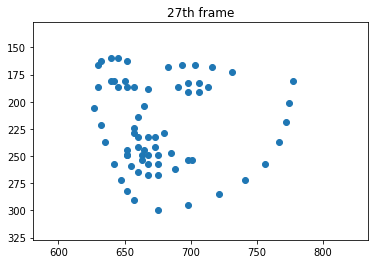

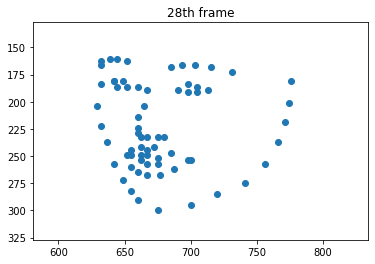

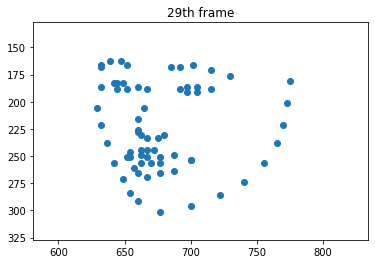

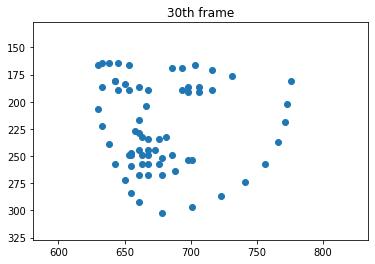

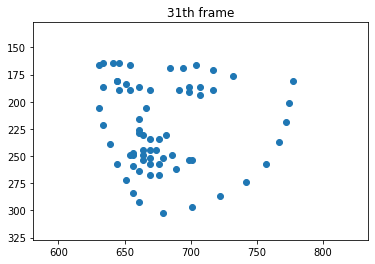

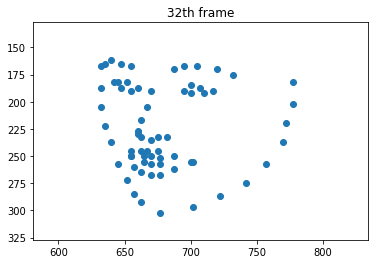

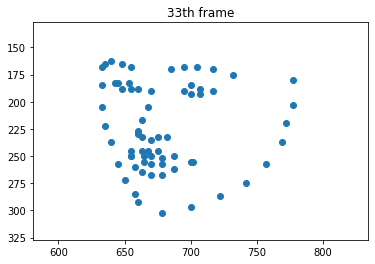

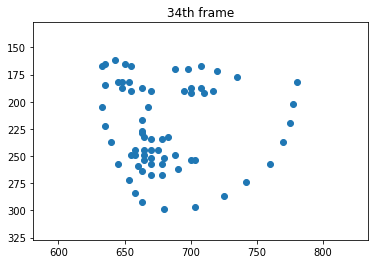

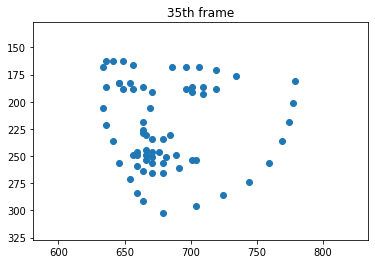

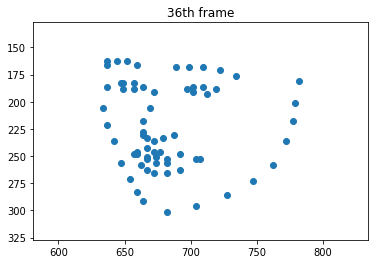

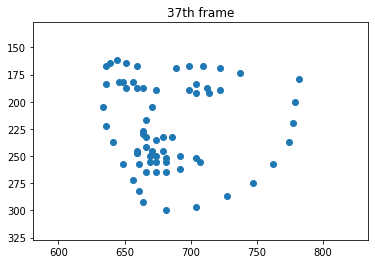

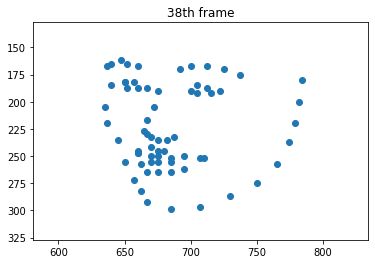

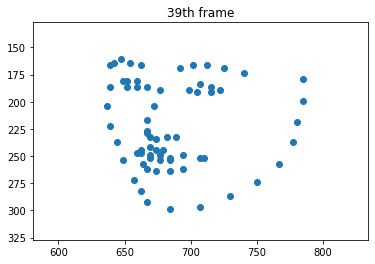

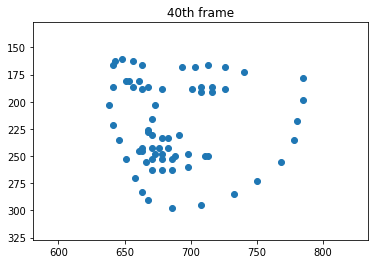

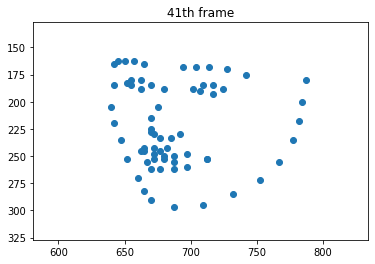

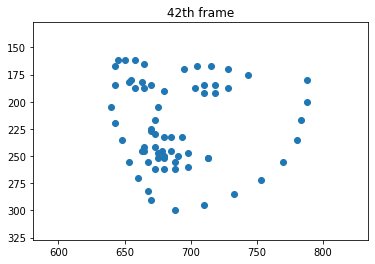

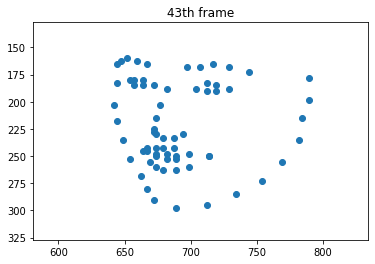

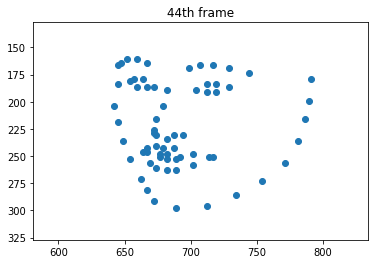

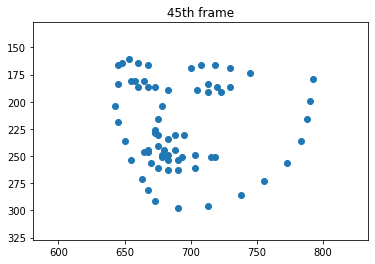

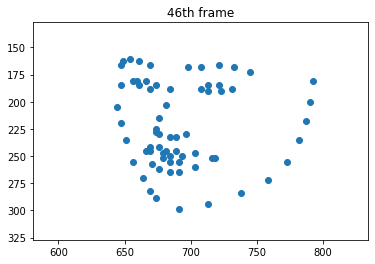

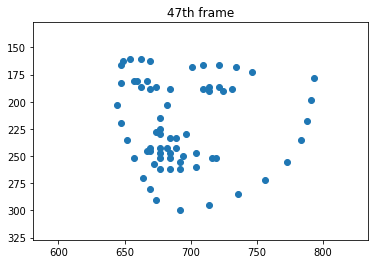

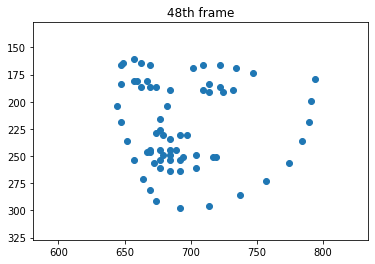

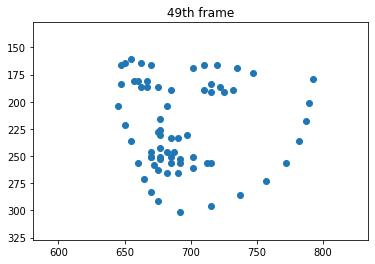

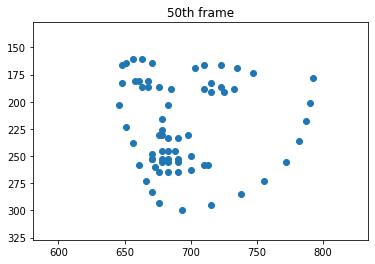

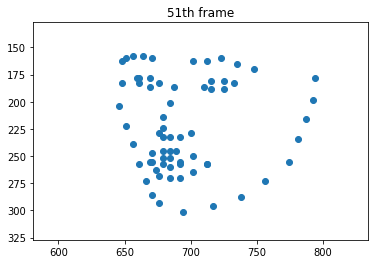

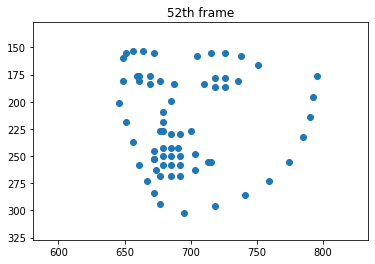

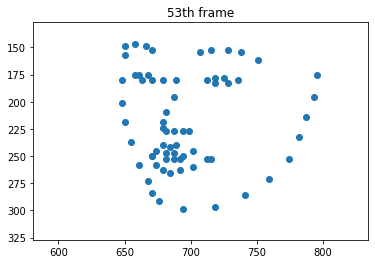

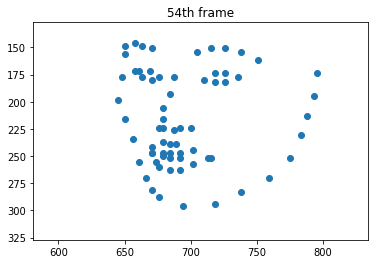

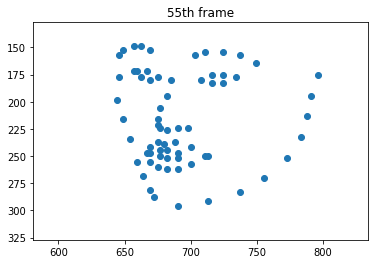

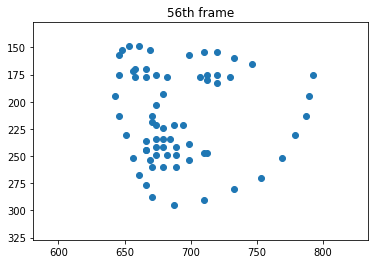

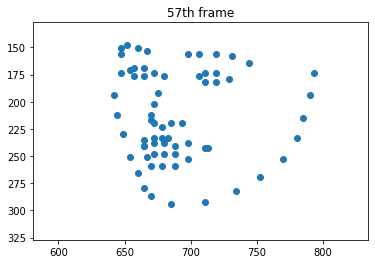

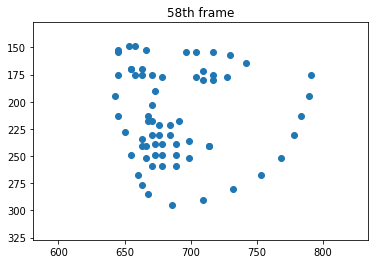

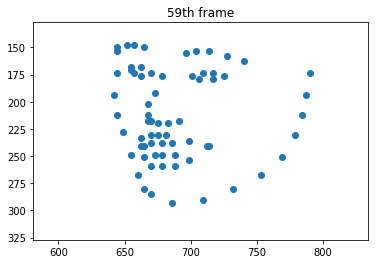

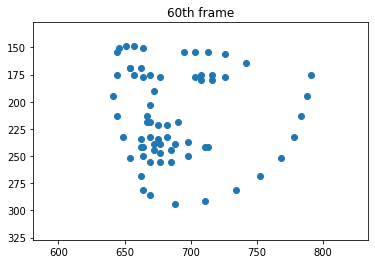

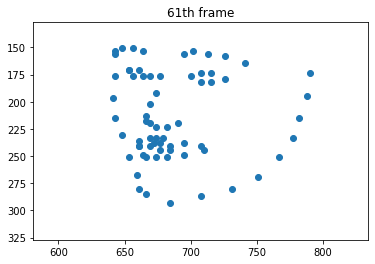

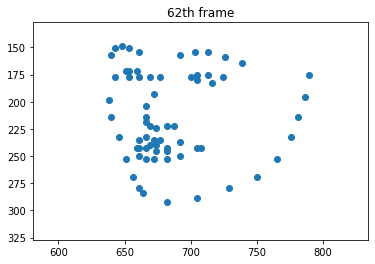

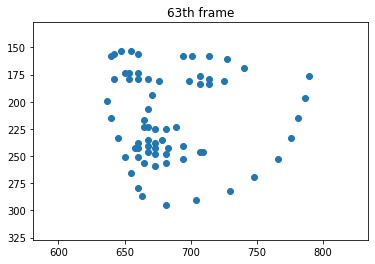

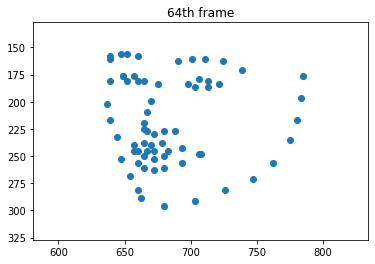

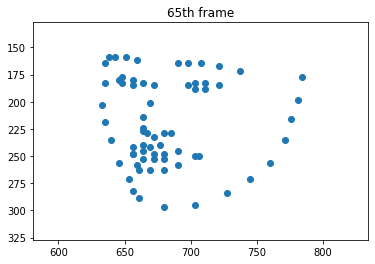

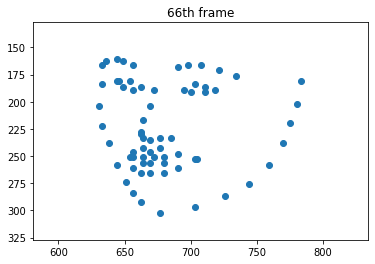

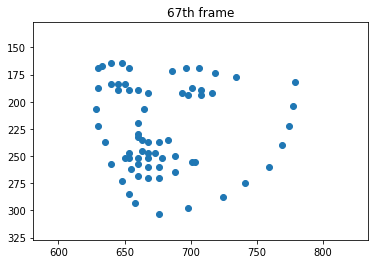

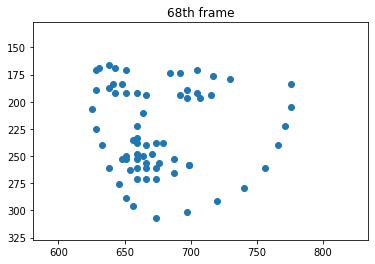

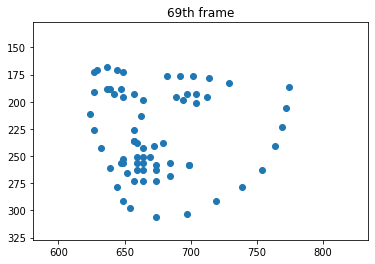

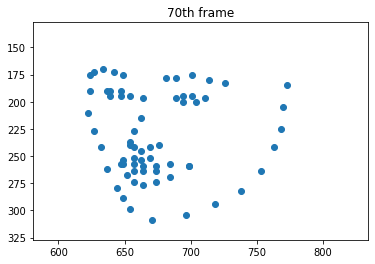

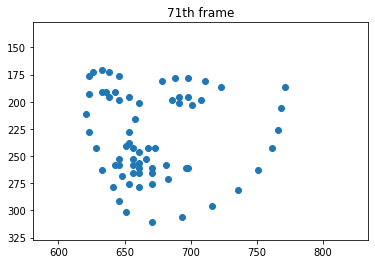

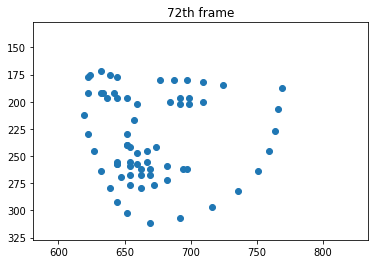

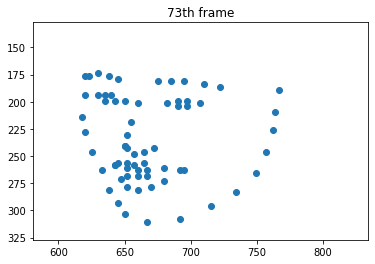

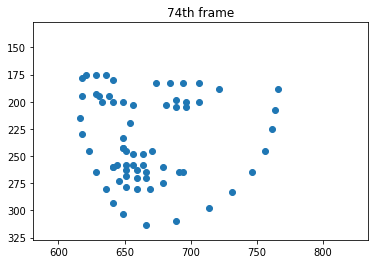

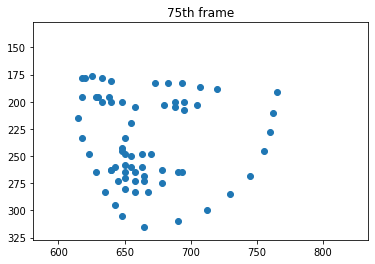

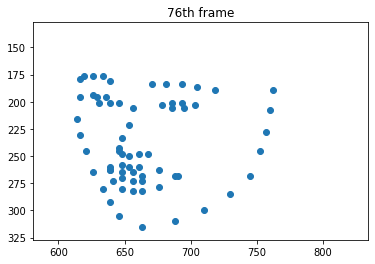

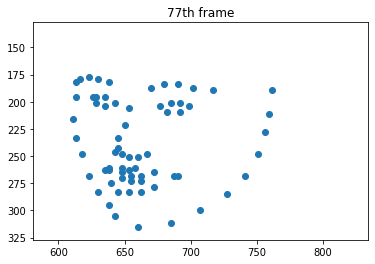

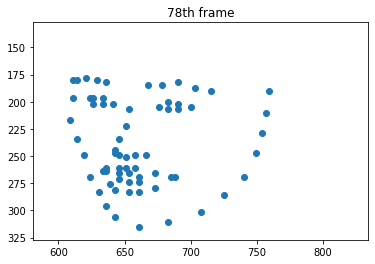

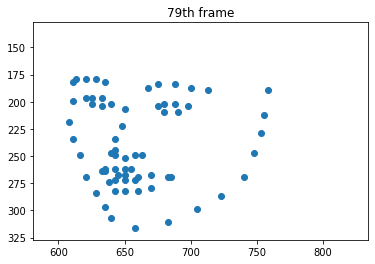

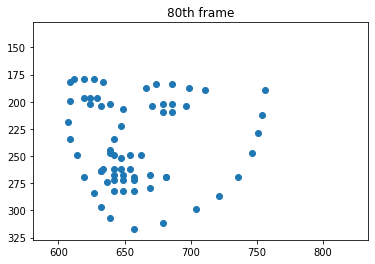

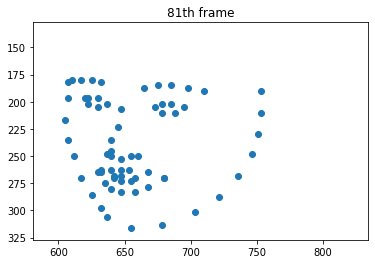

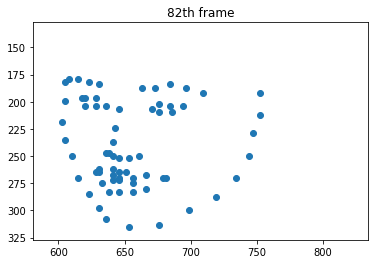

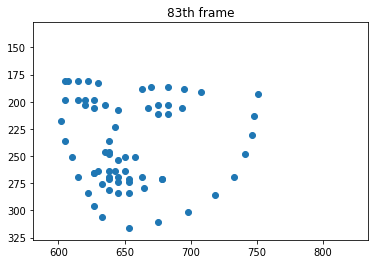

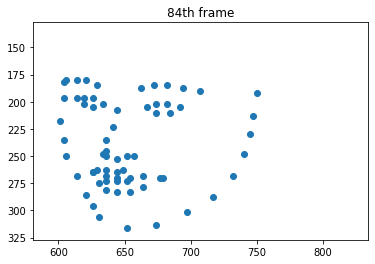

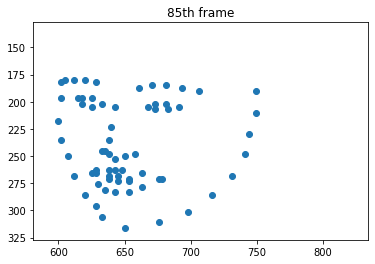

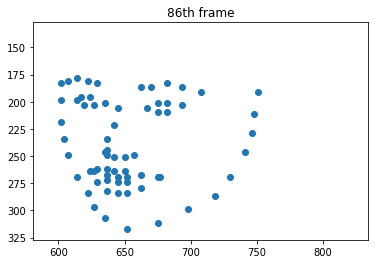

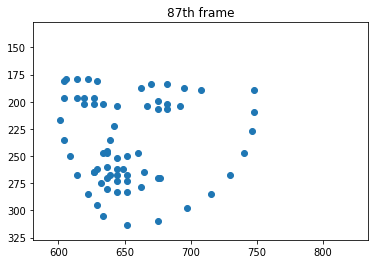

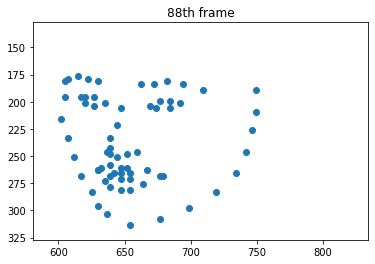

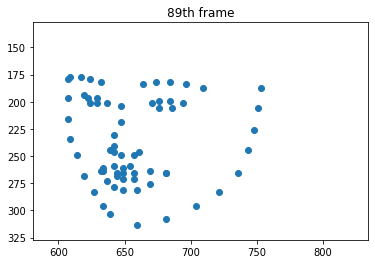

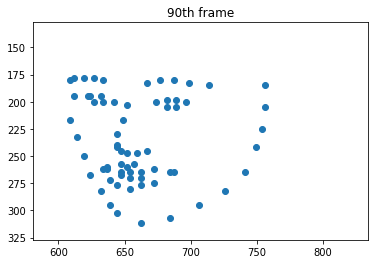

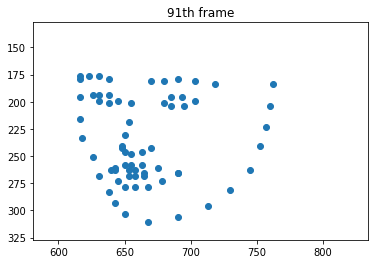

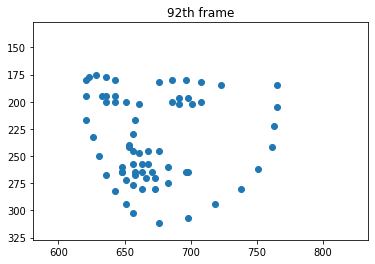

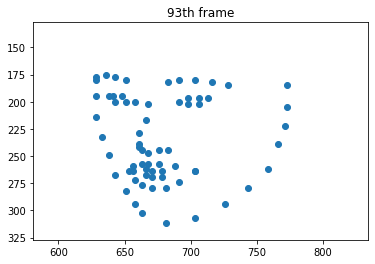

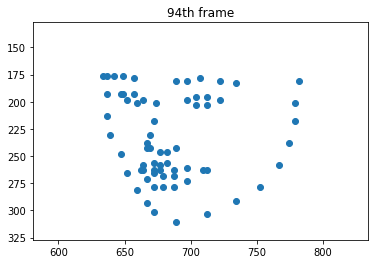

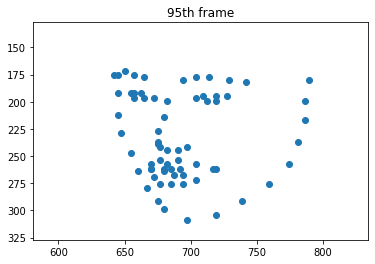

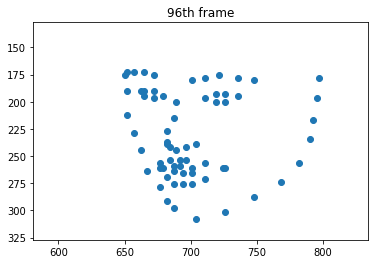

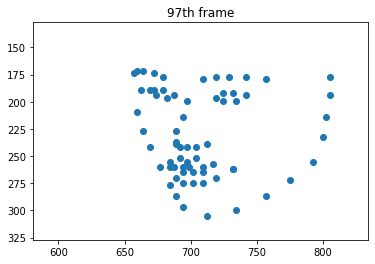

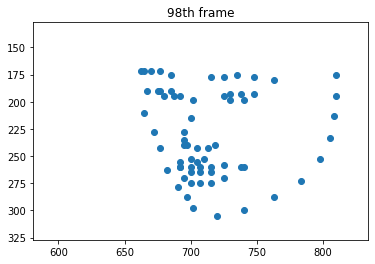

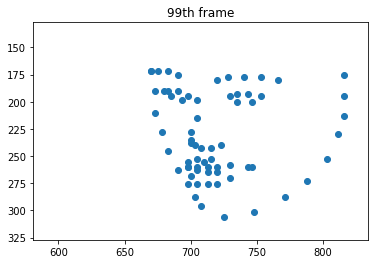

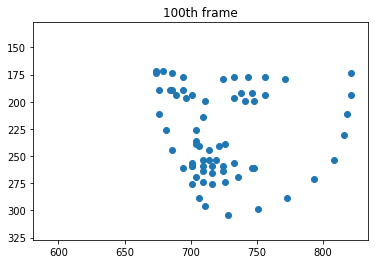

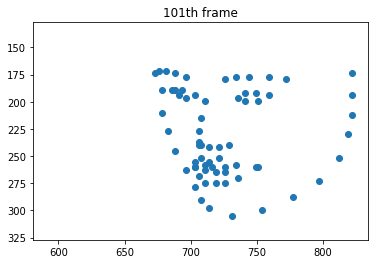

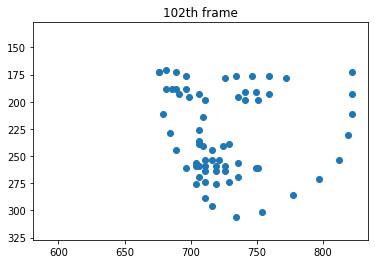

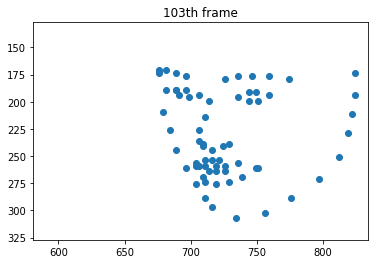

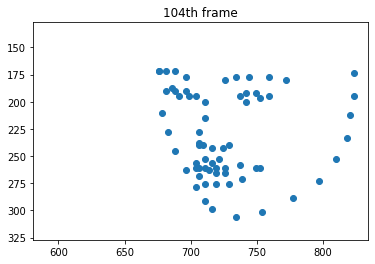

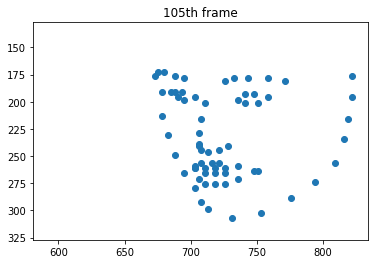

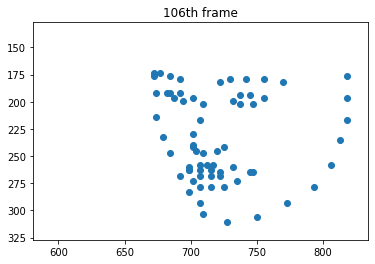

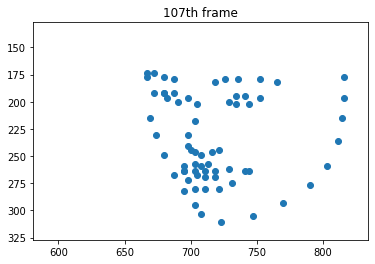

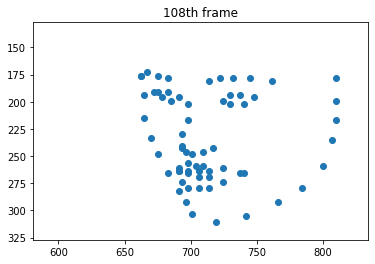

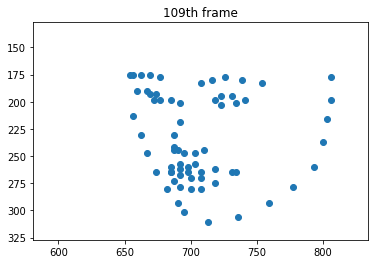

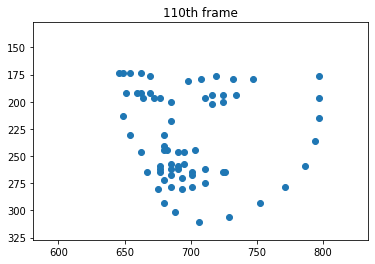

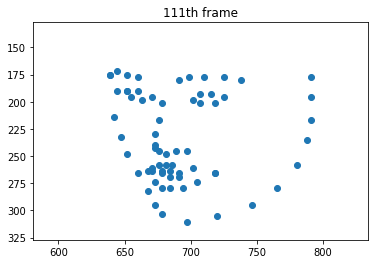

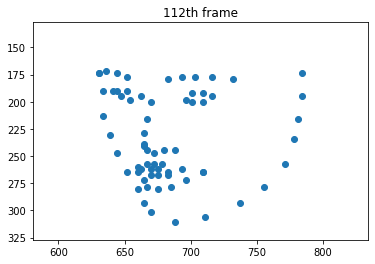

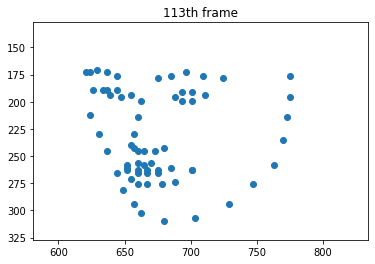

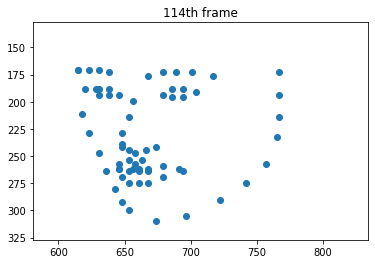

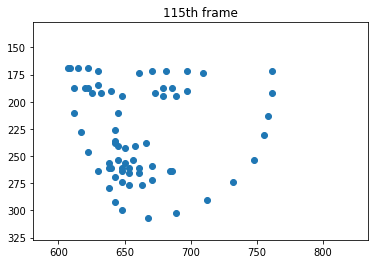

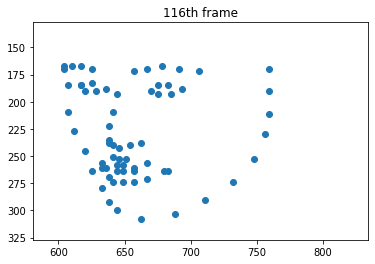

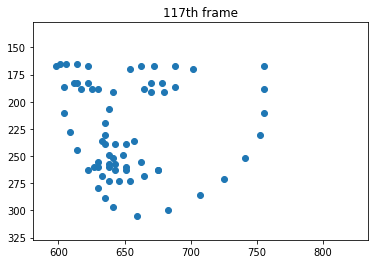

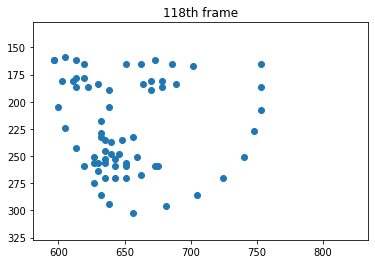

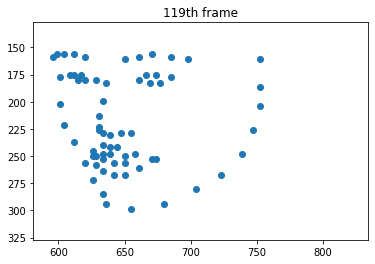

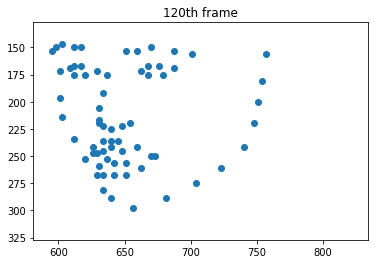

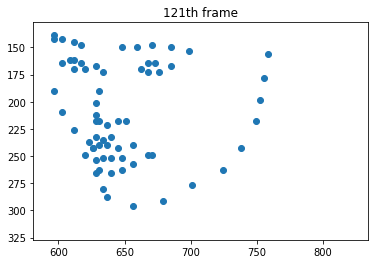

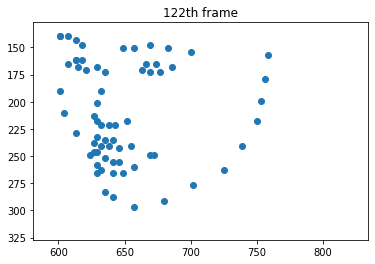

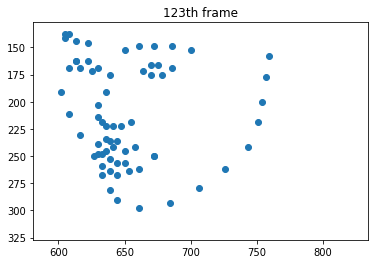

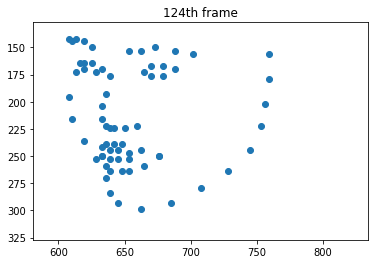

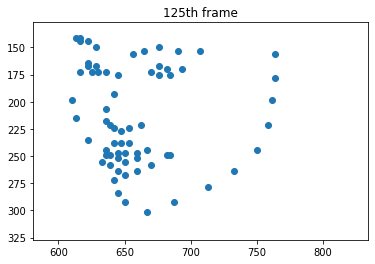

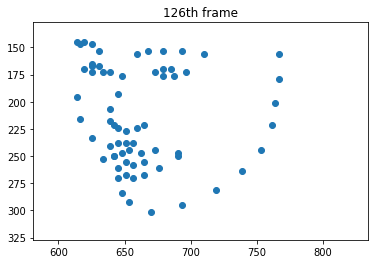

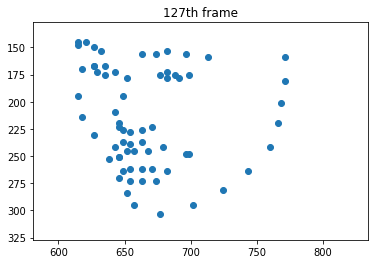

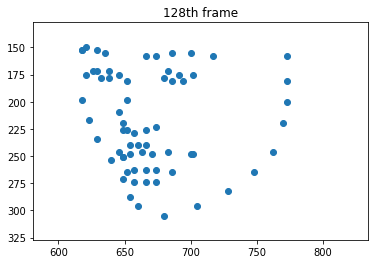

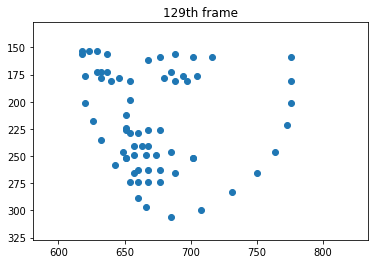

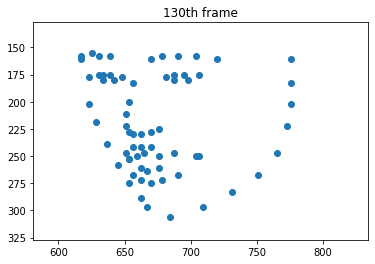

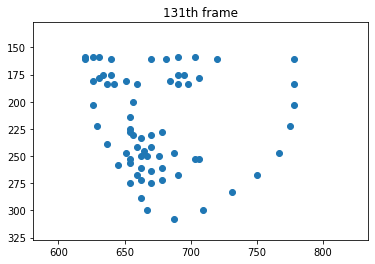

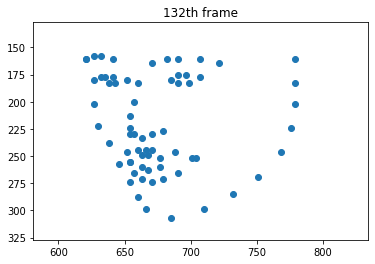

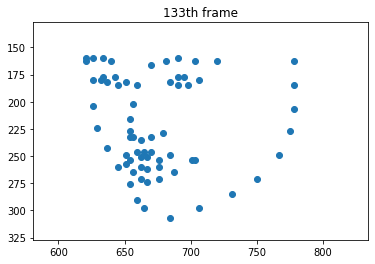

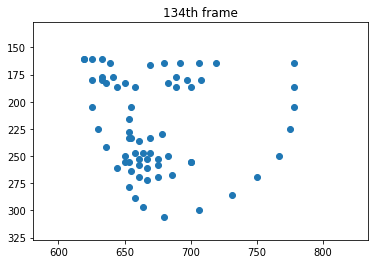

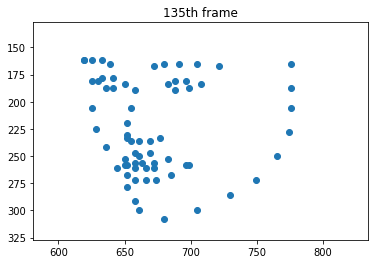

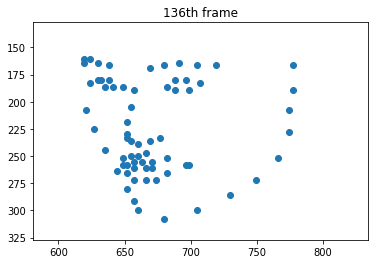

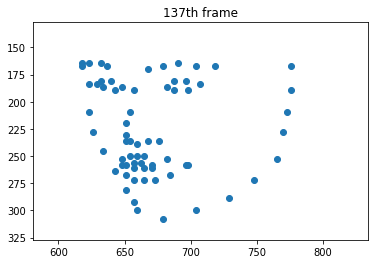

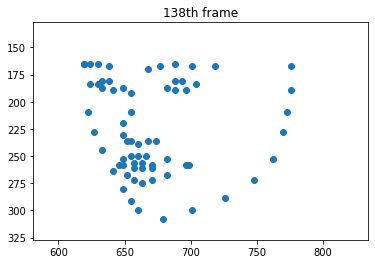

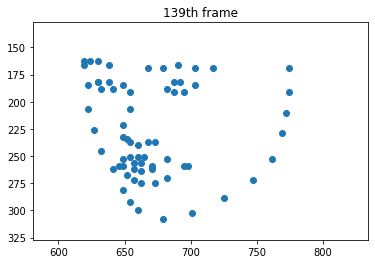

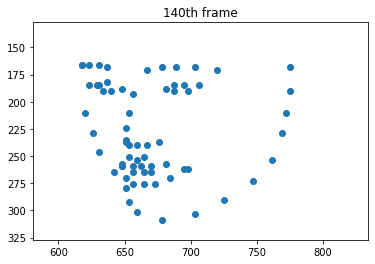

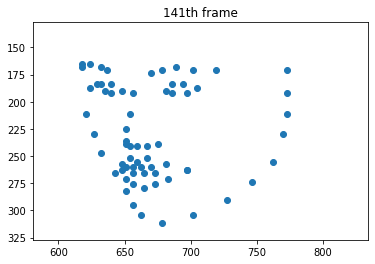

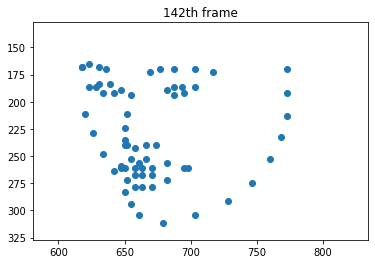

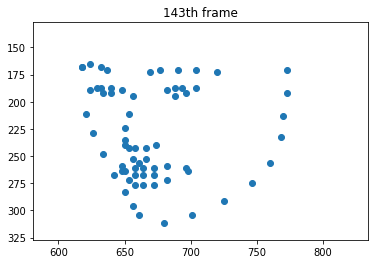

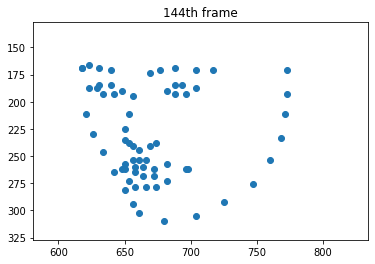

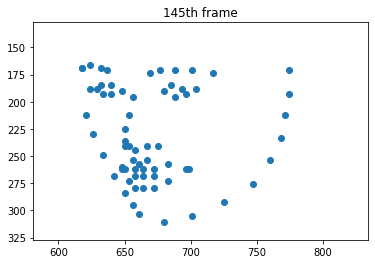

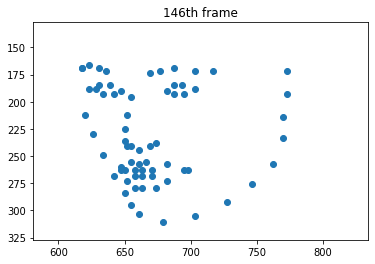

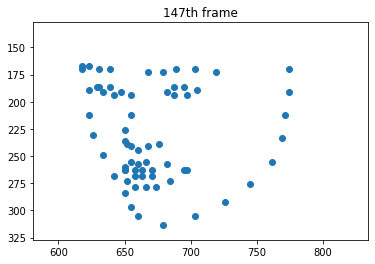

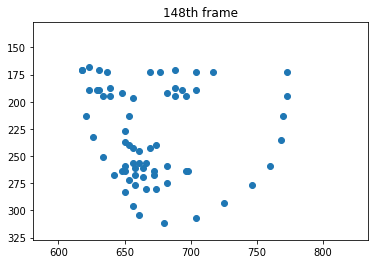

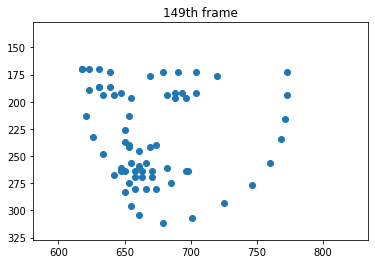

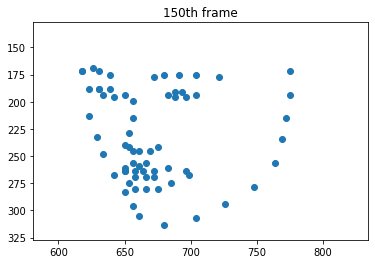

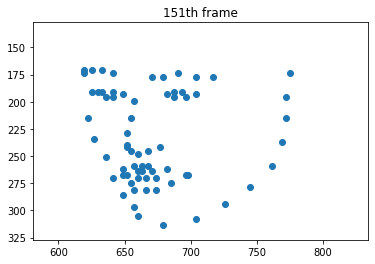

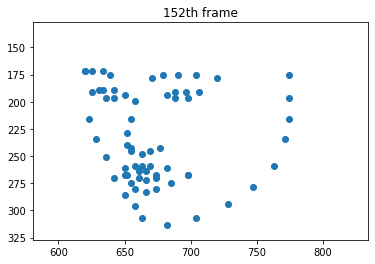

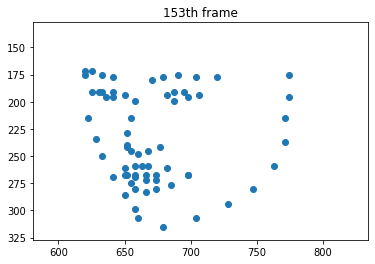

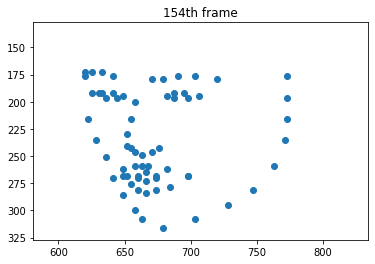

In [ ]:
import matplotlib.pyplot as plt
import os

os.makedirs('DEBUG', exist_ok=True)


emotion2num = {'anger': 0,
               'disgust': 1,
               'fear': 2,
               'joy': 3,
               'neutral': 4,
               'sadness': 5, 
               'surprise': 6}


num2emotion = {val: key for key, val in emotion2num.items()}
num2onehot = {0: np.array([1, 0, 0, 0, 0, 0, 0]),
              1: np.array([0, 1, 0, 0, 0, 0, 0]),
              2: np.array([0, 0, 1, 0, 0, 0, 0]),
              3: np.array([0, 0, 0, 1, 0, 0, 0]),
              4: np.array([0, 0, 0, 0, 1, 0, 0]),
              5: np.array([0, 0, 0, 0, 0, 1, 0]),
              6: np.array([0, 0, 0, 0, 0, 0, 1])}


query_idx = 126

X_chosen = X['train'][query_idx]
y_chosen = y['train'][query_idx]
num = np.where(y_chosen !=0)[0][0]

original_diautt_chosen = original_diautt['train'][query_idx]

x_min, x_max = X_chosen[:,:,0].min(), X_chosen[:,:,0].max()
y_min, y_max = X_chosen[:,:,1].min(), X_chosen[:,:,1].max()
margin = 10

print(y_chosen, num, num2emotion[num])

for idx, landmark in enumerate(X_chosen):
    plt.figure()
    plt.xlim((x_min-margin, x_max+margin))
    plt.ylim((y_min-margin, y_max+margin))
    plt.gca().invert_yaxis()
    plt.scatter(landmark[:,0], landmark[:,1])
    plt.title(f"{idx}th frame")
    plt.savefig(f'DEBUG/{str(idx).zfill(5)}.png')

In [ ]:
from glob import glob
import random
import os
import json
import numpy as np
import av
import matplotlib.pyplot as plt
import cv2
import random
from IPython.display import HTML
from base64 import b64encode

VIDEOS_PATH = "smaller-dataset/"

vid_path = os.path.join(VIDEOS_PATH, original_diautt_chosen) +  '.mp4'
container = av.open(vid_path)

frames = {}
for idx, frame in enumerate(container.decode(video=0)):
    numpy_RGB = np.array(frame.to_image())
    frames[idx] = numpy_RGB

print(vid_path)
annot = datasets['train'][original_diautt_chosen]

for key, val in annot.items():
    print(f"{key}: \t {val}")

mp4 = open(vid_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML("""
<video width=720 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

smaller-dataset/dia210_utt5.mp4
SrNo: 	 2133
Utterance: 	 Because Vincent, we were lovers.  For two years!
Speaker: 	 Joey
Emotion: 	 anger
Sentiment: 	 negative
Dialogue_ID: 	 210
Utterance_ID: 	 5
Season: 	 7
Episode: 	 23
StartTime: 	 00:18:31,068
EndTime: 	 00:18:37,532


In [ ]:
!rm out.mp4
!ffmpeg -i DEBUG/%05d.png -c:v libx264 -vf fps=24 -pix_fmt yuv420p out.mp4

vid_path = 'out.mp4'

mp4 = open(vid_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML("""
<video width=720 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

rm: cannot remove 'out.mp4': No such file or directory
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable

## Simple RNN training

In [ ]:
for key, val in X.items():
    print(key, len(val), val[0].shape)

train 517 (9, 68, 2)
dev 81 (30, 68, 2)
test 94 (72, 68, 2)


In [ ]:
for key, val in y.items():
    print(key, len(val), val[0].shape, val[0])

train 517 (7,) [0 1 0 0 0 0 0]
dev 81 (7,) [0 0 0 0 0 0 1]
test 94 (7,) [0 0 0 0 0 0 1]


In [ ]:
import csv

emotion2num = {'anger': 0,
               'disgust': 1,
               'fear': 2,
               'joy': 3,
               'neutral': 4,
               'sadness': 5, 
               'surprise': 6}


num2emotion = {val: key for key, val in emotion2num.items()}
num2onehot = {0: np.array([1, 0, 0, 0, 0, 0, 0]),
              1: np.array([0, 1, 0, 0, 0, 0, 0]),
              2: np.array([0, 0, 1, 0, 0, 0, 0]),
              3: np.array([0, 0, 0, 1, 0, 0, 0]),
              4: np.array([0, 0, 0, 0, 1, 0, 0]),
              5: np.array([0, 0, 0, 0, 0, 1, 0]),
              6: np.array([0, 0, 0, 0, 0, 0, 1])}


''' from https://github.com/pytorch/examples/blob/master/imagenet/main.py'''
class AverageMeter(object):

    """Computes and stores the average and current value"""

    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res


def adjust_learning_rate(lr, optimizer, epoch):
    """Sets the learning rate to the initial LR decayed by 10 every 8 epochs"""
    lr = lr * (0.1 ** (epoch // 8))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [ ]:
import torch
import pandas as pd
import numpy as np


class LandmarkDataLoader(object):

    def __init__(self, list_of_landmarks, list_of_labels, batch_size=1):
        self.batch_size = batch_size

        assert len(list_of_landmarks) == len(list_of_labels)
        self.list_of_landmarks = list_of_landmarks
        self.list_of_labels = list_of_labels
        self.n_samples = len(self.list_of_landmarks)
        self.n_batches = int(self.n_samples / self.batch_size)
        self.max_length = self._get_max_length()
        self._shuffle_indices()

        self.report()

    def _shuffle_indices(self):
        self.indices = np.random.permutation(self.n_samples)
        self.index = 0
        self.batch_index = 0

    def _get_max_length(self):
        length = 0
        for landmarks in self.list_of_landmarks:
            length = max(length, landmarks.shape[0])
        return length

    def _create_batch(self):
        _index = self.indices[self.index]
        self.index += 1
        self.batch_index += 1

        label = np.argmax(self.list_of_labels[_index])
        landmarks = self.list_of_landmarks[_index]
        seq_lengths = landmarks.shape[0]

        for idx, landmarks_ in enumerate(np.array(landmarks)):
            landmarks[idx] -= landmarks_[0]

        landmarks = landmarks.reshape((landmarks.shape[0], landmarks.shape[1]*landmarks.shape[2]))
        landmarks = torch.Tensor([landmarks])
        label = torch.LongTensor([label])
        seq_lengths = torch.LongTensor([seq_lengths])

        # print(landmarks.shape, landmarks)
        # print(label.shape, label)
        # print(seq_lengths.shape, seq_lengths)
        return landmarks, label, seq_lengths

    def __len__(self):
        return self.n_batches

    def __iter__(self):
        self._shuffle_indices()
        for i in range(self.n_batches):
            if self.batch_index == self.n_batches:
                raise StopIteration()
            yield self._create_batch()

    def show_samples(self, n=10):
        for sample in self.list_of_landmarks[:n]:
            print(sample.shape)

    def report(self):
        print('# samples: {}'.format(len(self.list_of_landmarks)))
        print('max len: {}'.format(self.max_length))
        # print('# vocab: {}'.format(len(self.word_to_index)))
        print('# batches: {} (batch_size = {})'.format(self.n_batches, self.batch_size))

In [ ]:
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence


class RNN(nn.Module):

    def __init__(self, embed_size, num_output, rnn_model='LSTM', use_last=True,
                 padding_index=0, hidden_size=64, num_layers=1, batch_first=True):
        """

        Args:
            vocab_size: vocab size
            embed_size: embedding size
            num_output: number of output (classes)
            rnn_model:  LSTM or GRU
            use_last:  bool
            embedding_tensor:
            padding_index:
            hidden_size: hidden size of rnn module
            num_layers:  number of layers in rnn module
            batch_first: batch first option
        """

        super(RNN, self).__init__()
        self.use_last = use_last

        self.drop_en = nn.Dropout(p=0.6)

        # rnn module
        if rnn_model == 'LSTM':
            self.rnn = nn.LSTM( input_size=embed_size, hidden_size=hidden_size, num_layers=num_layers, dropout=0.5,
                                batch_first=True, bidirectional=True)
        elif rnn_model == 'GRU':
            self.rnn = nn.GRU( input_size=embed_size, hidden_size=hidden_size, num_layers=num_layers, dropout=0.5,
                                batch_first=True, bidirectional=True)
        else:
            raise LookupError(' only support LSTM and GRU')
            
        self.fc = nn.Linear(hidden_size*2, num_output)

    def forward(self, x, seq_lengths):
        '''
        Args:
            x: (batch, time_step, input_size)

        Returns:
            num_output size
        '''

        # x_embed = self.encoder(x)
        # x_embed = self.drop_en(x_embed)
        x_embed = self.drop_en(x)
        packed_input = pack_padded_sequence(x_embed, seq_lengths.cpu().numpy(),batch_first=True)

        # r_out shape (batch, time_step, output_size)
        # None is for initial hidden state
        packed_output, ht = self.rnn(packed_input, None)
        out_rnn, _ = pad_packed_sequence(packed_output, batch_first=True)

        row_indices = torch.arange(0, x.size(0)).long()
        col_indices = seq_lengths - 1
        if next(self.parameters()).is_cuda:
            row_indices = row_indices.cuda()
            col_indices = col_indices.cuda()

        if self.use_last:
            last_tensor=out_rnn[row_indices, col_indices, :]
        else:
            # use mean
            last_tensor = out_rnn[row_indices, :, :]
            last_tensor = torch.mean(last_tensor, dim=1)

        # fc_input = self.bn2(last_tensor)
        fc_input = last_tensor
        out = self.fc(fc_input)
        return out

In [ ]:
import time
import gc
import os
import argparse

import numpy as np
import joblib
import torch
from torch import nn
import torch.backends.cudnn as cudnn

np.random.seed(0)
torch.manual_seed(0)

os.makedirs('gen', exist_ok=True)

args = {}

args['epochs'] = 5
args['batch_size'] = 1
args['lr'] = 0.005
args['weight_decay'] = 1e-4
args['print_freq'] = 10
args['save_freq'] = 1
args['embedding_size'] = 68*2
args['hidden_size'] = 128
args['layers'] = 2
args['classes'] = 7
args['min_samples'] = 5
args['cuda'] = False
args['glove'] = 'glove/glove.6B.100d.txt'
args['rnn'] = ['LSTM', 'GRU'][0]
args['mean_seq'] = False
args['clip'] = 0.25


# create trainer
print("===> creating dataloaders ...")
end = time.time()
train_loader = LandmarkDataLoader(X['train'], y['train'], batch_size=args['batch_size'])
val_loader = LandmarkDataLoader(X['dev'], y['dev'], batch_size=args['batch_size'])
print('===> dataloader creatin: {t:.3f}'.format(t=time.time()-end))

train_loader.show_samples()


# create model
print("===> creating rnn model ...")
# vocab_size = len(d_word_index)
model = RNN(embed_size=args['embedding_size'], num_output=args['classes'], rnn_model=args['rnn'],
            use_last=( not args['mean_seq']),
            hidden_size=args['hidden_size'], num_layers=args['layers'], batch_first=True)
print(model)

# optimizer and loss
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=args['lr'], weight_decay=args['weight_decay'])

criterion = nn.CrossEntropyLoss()
print(optimizer)
print(criterion)

if args['cuda']:
    torch.backends.cudnn.enabled = True
    cudnn.benchmark = True
    model.cuda()
    criterion = criterion.cuda()


def train(train_loader, model, criterion, optimizer, epoch):
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    top1 = AverageMeter()

    # switch to train mode
    model.train()

    end = time.time()
    for i, (input, target, seq_lengths) in enumerate(train_loader):
        # print(f"DEBUG {i}, {input.shape}, {target}, {seq_lengths}")
        # print(f"DEBUG {i} {input}, {target}, {seq_lengths}")
        # measure data loading time
        data_time.update(time.time() - end)

        if args['cuda']:
            input = input.cuda()
            target = target.cuda()

        # compute output
        output = model(input, seq_lengths)
        loss = criterion(output, target)

        # measure accuracy and record loss
        prec1 = accuracy(output.data, target, topk=(1,))
        losses.update(loss.data, input.size(0))
        top1.update(prec1[0][0], input.size(0))

        # compute gradient and do SGD step
        optimizer.zero_grad()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), args['clip'])
        optimizer.step()

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if i != 0 and i % args['print_freq'] == 0:
            print('Epoch: [{0}][{1}/{2}]  Time {batch_time.val:.3f} ({batch_time.avg:.3f})  '
                  'Data {data_time.val:.3f} ({data_time.avg:.3f})  Loss {loss.val:.4f} ({loss.avg:.4f})  '
                  'Prec@1 {top1.val:.3f} ({top1.avg:.3f})'.format(
                   epoch, i, len(train_loader), batch_time=batch_time, data_time=data_time, loss=losses, top1=top1))
            gc.collect()


def val_test(val_loader, model, criterion):
    batch_time = AverageMeter()
    losses = AverageMeter()
    top1 = AverageMeter()

    predictions = []
    truths = []

    # switch to evaluate mode
    model.eval()
    end = time.time()
    for i, (input, target,seq_lengths) in enumerate(val_loader):
        # print(f"DEBUG {i} {input.shape}, {target}, {seq_lengths}")
        # print(f"DEBUG {i} {input}, {target}, {seq_lengths}")

        if args['cuda']:
            input = input.cuda()
            target = target.cuda()

        # compute output
        output = model(input,seq_lengths)
        loss = criterion(output, target)

        # measure accuracy and record loss
        prec1 = accuracy(output.data, target, topk=(1,))
        losses.update(loss.data, input.size(0))
        top1.update(prec1[0][0], input.size(0))


        predictions.append(torch.nn.functional.softmax(output.data, dim=1).numpy().squeeze())
        truths.append(target.numpy()[0])

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if i!= 0 and i % args['print_freq'] == 0:
            print('Test: [{0}/{1}]  Time {batch_time.val:.3f} ({batch_time.avg:.3f})  '
                  'Loss {loss.val:.4f} ({loss.avg:.4f})  Prec@1 {top1.val:.3f} ({top1.avg:.3f})'.format(
                   i, len(val_loader), batch_time=batch_time, loss=losses, top1=top1))
            gc.collect()

    print(' * Prec@1 {top1.avg:.3f}'.format(top1=top1))
    return top1.avg, predictions, truths

===> creating dataloaders ...
# samples: 517
max len: 377
# batches: 517 (batch_size = 1)
# samples: 81
max len: 307
# batches: 81 (batch_size = 1)
===> dataloader creatin: 0.001
(9, 68, 2)
(54, 68, 2)
(86, 68, 2)
(64, 68, 2)
(45, 68, 2)
(28, 68, 2)
(30, 68, 2)
(27, 68, 2)
(61, 68, 2)
(134, 68, 2)
===> creating rnn model ...
RNN(
  (drop_en): Dropout(p=0.6, inplace=False)
  (rnn): LSTM(136, 128, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=256, out_features=7, bias=True)
)
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.005
    weight_decay: 0.0001
)
CrossEntropyLoss()


In [ ]:
# training and testing
for epoch in range(1, args['epochs']+1):

    adjust_learning_rate(args['lr'], optimizer, epoch)
    train(train_loader, model, criterion, optimizer, epoch)
    val_performance = val_test(val_loader, model, criterion)

    # save current model
    if epoch % args['save_freq'] == 0:
        name_model = f'rnn_epoch_{epoch}_acc_{val_performance}.pytorch'
        torch.save(model.state_dict(), name_model)

Epoch: [1][10/517]  Time 0.107 (0.159)  Data 0.001 (0.002)  Loss 0.8840 (1.9528)  Prec@1 100.000 (18.182)
Epoch: [1][20/517]  Time 0.131 (0.187)  Data 0.001 (0.029)  Loss 1.5216 (1.8843)  Prec@1 0.000 (23.810)
Epoch: [1][30/517]  Time 0.047 (0.180)  Data 0.000 (0.022)  Loss 3.6159 (2.0326)  Prec@1 0.000 (25.806)
Epoch: [1][40/517]  Time 0.129 (0.188)  Data 0.001 (0.018)  Loss 0.4561 (1.8357)  Prec@1 100.000 (36.585)
Epoch: [1][50/517]  Time 0.705 (0.202)  Data 0.005 (0.016)  Loss 3.4221 (2.0989)  Prec@1 0.000 (35.294)
Epoch: [1][60/517]  Time 0.321 (0.230)  Data 0.003 (0.015)  Loss 3.5687 (2.0179)  Prec@1 0.000 (39.344)
Epoch: [1][70/517]  Time 0.289 (0.217)  Data 0.002 (0.013)  Loss 0.4815 (1.9968)  Prec@1 100.000 (40.845)
Epoch: [1][80/517]  Time 0.123 (0.224)  Data 0.001 (0.013)  Loss 0.3419 (1.9472)  Prec@1 100.000 (43.210)
Epoch: [1][90/517]  Time 0.584 (0.216)  Data 0.004 (0.012)  Loss 0.0488 (1.9340)  Prec@1 100.000 (43.956)
Epoch: [1][100/517]  Time 0.092 (0.210)  Data 0.001 (0

In [ ]:
model = RNN(embed_size=args['embedding_size'], num_output=args['classes'], rnn_model=args['rnn'],
            use_last=( not args['mean_seq']),
            hidden_size=args['hidden_size'], num_layers=args['layers'], batch_first=True)

model.load_state_dict(torch.load('rnn_epoch_5_acc_48.14814758300781.pytorch'))


test_loader = LandmarkDataLoader(X['test'], y['test'], batch_size=args['batch_size'])


acc_train, predictions_train, truths_train = val_test(train_loader, model, criterion)
acc_dev, predictions_dev, truths_dev = val_test(val_loader, model, criterion)
acc_test, predictions_test, truths_test = val_test(test_loader, model, criterion)

In [ ]:
from sklearn.metrics import classification_report, f1_score

print('train')
foo = classification_report(truths_train, [np.argmax(foo) for foo in predictions_train])
print(foo)
print(f"weighted f1 score: ", f1_score(truths_train, [np.argmax(foo) for foo in predictions_train], average='weighted'))
print()

print('dev')
foo = classification_report(truths_dev, [np.argmax(foo) for foo in predictions_dev])
print(foo)
print(f"weighted f1 score: ", f1_score(truths_dev, [np.argmax(foo) for foo in predictions_dev], average='weighted'))
print()

print('test')
foo = classification_report(truths_test, [np.argmax(foo) for foo in predictions_test])
print(foo)
print(f"weighted f1 score: ", f1_score(truths_test, [np.argmax(foo) for foo in predictions_test], average='weighted'))
print()

train
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00        91
           4       0.47      1.00      0.64       244
           5       0.00      0.00      0.00        39
           6       0.00      0.00      0.00        64

    accuracy                           0.47       517
   macro avg       0.07      0.14      0.09       517
weighted avg       0.22      0.47      0.30       517

weighted f1 score:  0.30264565864420484

dev
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        16
           4       0.48      1.00      0.65        39
           5       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
